# Zomato Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Zomato data .csv")

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
df.shape

(148, 7)

# conversion of data type 

In [8]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# types of restaurent

Text(0.5, 0, 'type of restaurent')

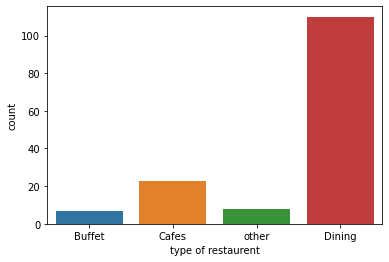

In [11]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('type of restaurent')

# majority orders from dining

Text(0, 0.5, 'Votes')

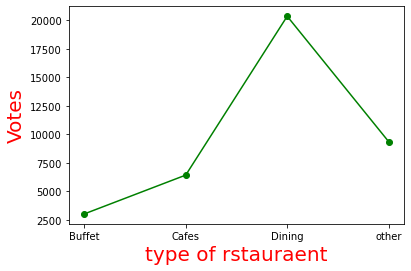

In [14]:
grouped_data= df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : grouped_data})
plt.plot(result, c='green' , marker='o')
plt.xlabel('type of rstauraent' , c= 'red',size = 20)
plt.ylabel('Votes', c='red',size=20)

# Dining has more votes than any other type

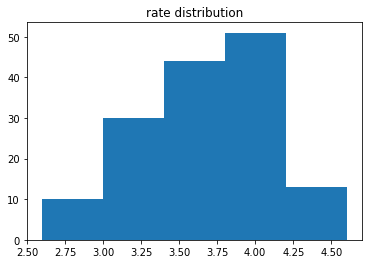

In [18]:
plt.hist(df['rate'], bins = 5)
plt.title("rate distribution")
plt.show()

# majority rates restaurants recived are between 3.5 to 4

df.info()

In [20]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# avg order spending by couple

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='count'>

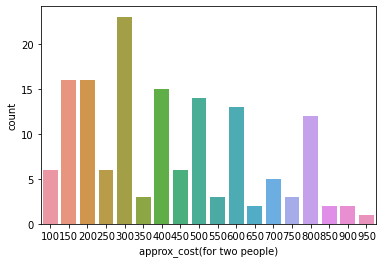

In [21]:
couple_data= df['approx_cost(for two people)']
sns.countplot(x=couple_data)

# avg order spending is 300 rs

In [22]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# which mode has max rating

<AxesSubplot:xlabel='online_order', ylabel='rate'>

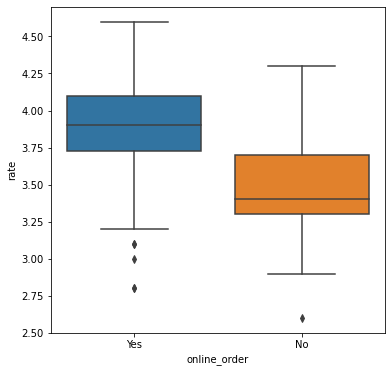

In [23]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order', y = 'rate' , data=df)

# offline order recives lower rating than online order


In [24]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


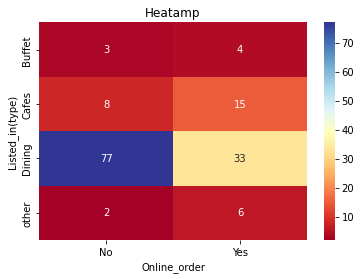

In [34]:
pivot_table=df.pivot_table(index = 'listed_in(type)', columns = 'online_order' ,aggfunc = 'size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="RdYlBu", fmt='d')
plt.title("Heatamp")
plt.xlabel("Online_order")
plt.ylabel("Listed_in(type)")
plt.show()